##### Import the required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import pickle

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

##### Set path to the data directory

In [2]:
os.chdir("/Users/ajeet/Google Drive/DSAssignment/AVTwittterSentimentAnalysis")

In [3]:
ls

dataframeTrain.csv             testFinalNB.csv
sample_submission_3Mm4cJo.csv  testFinalRF.csv
testFinalANN.csv               test_tweets_anuFYb8.csv
testFinalANN1.csv              train_E6oV3lV.csv
testFinalANN_tfidf.csv


##### Load the data

In [4]:
trainData = pd.read_csv("train_E6oV3lV.csv")

In [5]:
trainData.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
trainData['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
testData = pd.read_csv("test_tweets_anuFYb8.csv")

In [8]:
testData.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [9]:
trainData.shape

(31962, 3)

In [10]:
testData.shape

(17197, 2)

# Data Cleaning and Text Preprocessing

In [11]:
from bs4 import BeautifulSoup   
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

##### Method to perform data cleaning

In [12]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review,"lxml").get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words and perform stemming
    manualStops = ['user','day']
    ps = PorterStemmer()
    meaningful_words = [ps.stem(w) for w in words if not w in set(stops)] 
    meaningful_words = [w for w in meaningful_words if not w in set(manualStops)] 
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [13]:
# Get the number of reviews based on the dataframe column size
num_reviews_train = trainData["tweet"].size
num_reviews_test = testData["tweet"].size

In [14]:
num_reviews_train

31962

In [15]:
num_reviews_test

17197

##### Clean train data

In [16]:
# Initialize an empty list to hold the clean reviews
print("Cleaning and parsing the training set movie reviews...\n")
clean_train_reviews = []
for i in range( 0, num_reviews_train ):
    # If the index is evenly divisible by 50000, print a message
    if( (i+1)%10000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews_train )                                                                    )
    clean_train_reviews.append( review_to_words( trainData["tweet"][i] ))

Cleaning and parsing the training set movie reviews...

Review 10000 of 31962

Review 20000 of 31962

Review 30000 of 31962



##### Clean the test data

In [17]:
print("Cleaning and parsing the test set movie reviews...\n")
clean_test_reviews = []
for i in range( 0, num_reviews_test ):
    # If the index is evenly divisible by 10000, print a message
    if( (i+1)%10000 == 0 ):
        print("Review %d of %d\n" % ( i+1, num_reviews_test )                                                                    ) 
    clean_test_reviews.append( review_to_words( testData["tweet"][i] ))

Cleaning and parsing the test set movie reviews...

Review 10000 of 17197



In [18]:
clean_test_reviews[0]

'studiolif aislif requir passion dedic willpow find newmateri'

In [19]:
testData['tweet'][0]

'#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ\x80¦ '

In [20]:
clean_train_reviews[0]

'father dysfunct selfish drag kid dysfunct run'

In [21]:
trainData['tweet'][0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

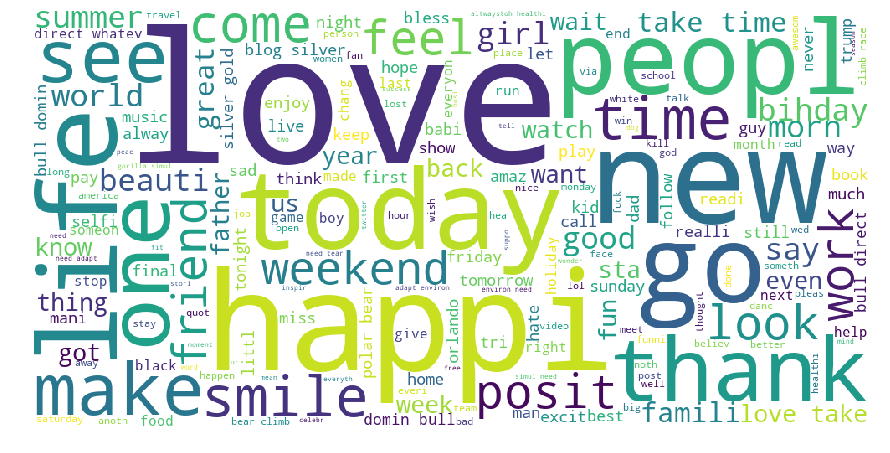

In [22]:
#Plot wordcloud 
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(clean_train_reviews))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

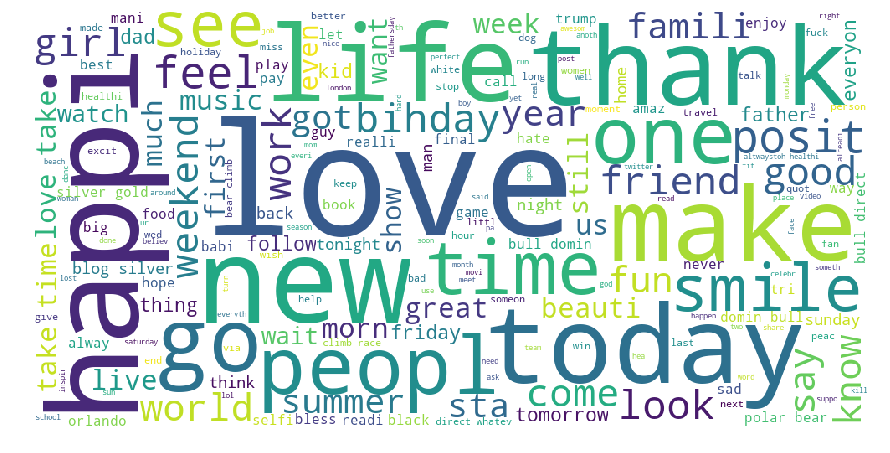

In [23]:
#Plot wordcloud 
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(clean_test_reviews))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Creating the Bag of Words model(Tokenization)

##### Train Data

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word", max_features = 9000) 

#The input to fit_transform should be a list of strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()


##### Creating feature matrix and the target variable vector of training data

In [26]:
X = train_data_features
y = trainData['label'].values

In [27]:
y

array([0, 0, 0, ..., 0, 1, 0])

##### Test Data

In [28]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

##### Creating feature matrix of test data¶

In [29]:
X_test = test_data_features

# TFIDF Bag of words Model

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vectorizer_tfidf = TfidfVectorizer(sublinear_tf=True, use_idf =True,max_features = 9000)

train_data_features_tfidf = vectorizer_tfidf.fit_transform(clean_train_reviews)

train_data_features_tfidf = train_data_features_tfidf.toarray()

In [32]:
X_tfidf = train_data_features_tfidf
y_tfidf = trainData['label'].values

In [33]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features_tfidf = vectorizer_tfidf.transform(clean_test_reviews)
test_data_features_tfidf = test_data_features_tfidf.toarray()

In [34]:
X_test_tfidf = test_data_features_tfidf

# Model Building

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y,stratify=y, test_size = 0.20, random_state = 0)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1-Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:



# Fitting Naive Bayes to the Training set
#from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_validation)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred_NB)


In [67]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred_NB))

0.790082903175348


##### Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_NB, X = X_train, y = y_train, cv = 10,n_jobs = -1)

In [70]:
accuracies.mean()

0.7903329333673114

##### Submission

In [72]:
FinalPred_NB =  classifier_NB.predict(X_test)

In [74]:
testFinalNB = pd.DataFrame(testData['id'])


testFinalNB['label'] = pd.DataFrame(FinalPred_NB)

testFinalNB.head()


,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [75]:
testFinalNB['label'].value_counts()

0    12443
1     4754
Name: label, dtype: int64

In [76]:
testFinalNB.to_csv("testFinalNB.csv",index=False)

In [77]:
cm

array([[4725, 1220],
       [ 122,  326]])

In [78]:
(4725+326)/(4814+275+1220+122)

0.7854143990048204

In [79]:
TN, FP, FN, TP = cm.ravel()

In [80]:
Precision = TP/TP+FP

In [81]:
Recall = TP/TP+FN

In [82]:
2*(Recall * Precision) / (Recall + Precision)

223.48660714285714

In [ ]:
Naive-Bayes TFIDF

# 3-ANN

In [108]:
import keras
#Sequence library help us to initialize the NN
from keras.models import Sequential

#Dense library used ti create the Layer of the NN
from keras.layers import Dense

from keras.layers import Dropout
from keras.constraints import maxnorm

In [84]:
X_train.shape

(25569, 9000)

In [209]:
# Initialising the ANN
classifier = Sequential()

classifier.add(Dropout(0.25, input_shape=(9000,)))
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 4500, init = 'uniform', activation = 'relu', kernel_constraint=maxnorm(3)))

classifier.add(Dropout(0.25))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 4500, init = 'uniform', activation = 'relu',kernel_constraint=maxnorm(3)))

classifier.add(Dropout(0.25))

# # Adding the Third hidden layer
# classifier.add(Dense(output_dim = 3500, init = 'uniform', activation = 'relu'))


# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 1024, nb_epoch = 10)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_constraint=<keras.con..., units=4500, kernel_initializer="uniform")`
  
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_constraint=<keras.con..., units=4500, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
/Users/ajeet/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
25569/25569 [==============================] - 144s 6ms/step - loss: 0.4623 - acc: 0.9176
Epoch 2/10
25569/25569 [==============================] - 131s 5ms/step - loss: 0.1804 - acc: 0.9298
Epoch 3/10
25569/25569 [==============================] - 130s 5ms/step - loss: 0.1231 - acc: 0.9305
Epoch 4/10
25569/25569 [==============================] - 129s 5ms/step - loss: 0.0963 - acc: 0.9440
Epoch 5/10
25569/25569 [==============================] - 142s 6ms/step - loss: 0.0787 - acc: 0.9745
Epoch 6/10
25569/25569 [==============================] - 151s 6ms/step - loss: 0.0625 - acc: 0.9828
Epoch 7/10
18432/25569 [====================>.........] - ETA: 46s - loss: 0.0463 - acc: 0.9872

KeyboardInterrupt: 

In [210]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_validation)
y_pred_ANN = (y_pred_ANN > 0.3)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ANN = confusion_matrix(y_validation, y_pred_ANN)

In [211]:
cm_ANN

array([[5887,   58],
       [ 167,  281]])

In [212]:

TN, FP, FN, TP = cm_ANN.ravel()

Precision = TP/TP+FP

Recall = TP/TP+FN

2*(Recall * Precision) / (Recall + Precision)

87.33039647577093

In [213]:
Precision

59.0

In [214]:
(7394+293)/(7394+293+66+238)

0.9619572018520836

In [215]:
Recall

168.0

In [216]:
#FinalPred_ANN

In [217]:
FinalPred_ANN =  classifier.predict(X_test)
FinalPred_ANN = (FinalPred_ANN > 0.4)


In [218]:
FinalPred_ANN

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [219]:
testFinalANN = pd.DataFrame(testData['id'])

In [220]:
testFinalANN['label'] = pd.DataFrame(FinalPred_ANN)

In [221]:
testFinalANN.head()

,id,label
0,31963,False
1,31964,False
2,31965,False
3,31966,False
4,31967,False


In [222]:
testFinalANN['label'].value_counts()

False    16322
True       875
Name: label, dtype: int64

In [223]:
type(testFinalANN)

pandas.core.frame.DataFrame

In [224]:
testFinalANN['label'].replace({False: 0, True: 1}, inplace=True)

In [225]:
testFinalANN.head()

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [226]:
testFinalANN.tail()

,id,label
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0
17196,49159,0


In [227]:
testFinalANN['label'].value_counts()

0    16322
1      875
Name: label, dtype: int64

In [228]:
testFinalANN.to_csv("testFinalANN.csv",index=False)

# ANN-TFIDF

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train_tfidf, X_validation_tfidf, y_train_tfidf, y_validation_tfidf = train_test_split(X_tfidf, y_tfidf,stratify=y_tfidf
                                                                                        , test_size = 0.20, random_state = 0)

In [ ]:
X_train_tfidf.shape

In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 4551, init = 'uniform', activation = 'relu', input_dim = 9000))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 4551, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train_tfidf, y_train_tfidf, batch_size = 1024, nb_epoch = 10)

In [ ]:

# Predicting the Test set results
y_pred_ANN_tfidf = classifier.predict(X_validation_tfidf)
y_pred_ANN_tfidf = (y_pred_ANN_tfidf > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_ANN_tfidf = confusion_matrix(y_validation_tfidf, y_pred_ANN_tfidf)



TN, FP, FN, TP = cm_ANN_tfidf.ravel()

Precision = TP/TP+FP

Recall = TP/TP+FN

2*(Recall * Precision) / (Recall + Precision)



In [ ]:

#FinalPred_ANN

FinalPred_ANN_tfidf =  classifier.predict(X_test_tfidf)
FinalPred_ANN_tfidf = (FinalPred_ANN_tfidf > 0.5)




testFinalANN_tfidf = pd.DataFrame(testData['id'])



testFinalANN_tfidf['label'] = pd.DataFrame(FinalPred_ANN_tfidf)

testFinalANN_tfidf.head()


testFinalANN_tfidf['label'].value_counts()



testFinalANN_tfidf['label'].replace({False: 0, True: 1}, inplace=True)

testFinalANN_tfidf.head()


testFinalANN_tfidf.tail()


testFinalANN_tfidf['label'].value_counts()


testFinalANN_tfidf.to_csv("testFinalANN_tfidf.csv",index=False)


# 3-Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Initialize a Random Forest classifier with 100 trees
classifier_RF = RandomForestClassifier(n_estimators = 20) 

classifier_RF.fit(X_train, y_train)

In [ ]:
#Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_validation)

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred_RF)

In [ ]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred_RF))

In [ ]:
accuracies = cross_val_score(estimator = classifier_RF, X = X_train, y = y_train, cv = 10,n_jobs = -1)

In [ ]:
accuracies.mean()

In [ ]:
TN, FP, FN, TP = cm.ravel()

Precision = TP/TP+FP

Recall = TP/TP+FN

2*(Recall * Precision) / (Recall + Precision)

In [ ]:
Precision

In [ ]:
Recall

In [ ]:
FinalPred_RF =  classifier_RF.predict(X_test)

In [ ]:
testFinalRF = pd.DataFrame(testData['id'])


testFinalRF['label'] = pd.DataFrame(FinalPred_RF)

testFinalRF.head()

In [ ]:
testFinalRF.to_csv("testFinalRF.csv",index=False)

# Plot Word-cloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
X_train_df = pd.DataFrame(clean_train_reviews)

In [ ]:
X_test_df = pd.DataFrame(clean_test_reviews)

In [ ]:
X_train_df.head()

In [ ]:
X_test_df.head()

In [ ]:
type(trainData['tweet'])

In [ ]:
X_train_df.head()

## 1- Plot Training Data

In [ ]:
#Plot wordcloud 
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(X_train_df[0]))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 1- Plot Testing Data

In [ ]:
#Plot wordcloud 
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(X_test_df[0]))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
trainData['tweet'][0]

In [ ]:
trainData['tweet'][1]

In [ ]:
X_train_df[0][1]

In [ ]:
trainData['tweet'][18]

In [ ]:
X_train_df[0][4]

<font color = blue>Conclusion- 1: Correct Abusive words(contractions)- can't = can not, don't = do not, i'm = I am


2: Remove user as a stopwords manually


3:Make correct from shortcuts- like- cause- because, u - you, ur- your, gr8 = great, </font>

# TextBlob

In [ ]:
dataframeTrain = pd.DataFrame(clean_train_reviews)

In [ ]:
dataframeTrain['label'] = pd.DataFrame(trainData['label'])

In [ ]:
dataframeTrain.head()

In [ ]:
dataframeTrain[0].isnull().sum()

In [ ]:
dataframeTrain.to_csv('dataframeTrain.csv', header=False, index=False)

In [ ]:
a = open('dataframeTrain.csv','r').read()   # this is string
a_list = a.split('\n')
a_list_of_tuple = [tuple(x.split(',')) for x in a_list]

In [ ]:
len(a_list_of_tuple)

In [ ]:
a_list_of_tuple[len(a_list_of_tuple)-1]

In [ ]:
a_list_of_tuple.pop(len(a_list_of_tuple)-1)

In [ ]:
a_list_of_tuple[len(a_list_of_tuple)-1]

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(a_list_of_tuple)

In [ ]:
import pickle
# save the model to disk
filename = 'NBTextBlob.sav'
pickle.dump(cl, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
NBTextBlob = pickle.load(open(filename, 'rb'))
#result = RF_model.score(X_test, Y_test)
#print(result)

# XGBoost

In [37]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier_xg = XGBClassifier()
classifier_xg.fit(X_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [42]:
#Final Submission XGBoost

FinalPred_XG =  classifier_xg.predict(X_test)
testFinalXG = pd.DataFrame(testData['id'])


testFinalXG['label'] = pd.DataFrame(FinalPred_XG)

testFinalXG.head()
testFinalXG.to_csv("testFinalXGBoost.csv",index=False)


/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [43]:
testFinalXG['label'].value_counts()

0    16898
1      299
Name: label, dtype: int64